# Python 

Question: 1


You have an input dictionary given,

input_dict = {"abc":{"def":{"ghi":{"jkl":{"mno":{"pqr":{"stu":{"vwx":{"yz":"you are finally here !!!"}}}}}}}}}

Task:  You have to write a Python function that will take this input and print it like that,

output = {"abc":["def","ghi","jkl","mno","pqr","stu","vwx","yz"],
 "def":["ghi","jkl","mno","pqr","stu","vwx","yz"],
 "ghi":["jkl","mno","pqr","stu","vwx","yz"],
 "jkl":["mno","pqr","stu","vwx","yz"],
 "mno":["pqr","stu","vwx","yz"],
 "pqr":["stu","vwx","yz"],
 "stu":["vwx","yz"],
 "vwx":["yz"],
 "yz":["you are finally here !!!"]}


In [149]:
def transform_dict(input_dict, prefix=None):
    if prefix is None:
        prefix = []

    output = {}

    for key, value in input_dict.items():
        new_prefix = prefix + [key]
        if isinstance(value, dict):
            sub_dict = transform_dict(value, new_prefix)
            output[key] = list(sub_dict.keys())
            output.update(sub_dict)
        else:
            output[key] = [repr(value).strip("'")]

    return output
input_dict = {"abc":{"def":{"ghi":{"jkl":{"mno":{"pqr":{"stu":{"vwx":{"yz":"you are finally here !!!"}}}}}}}}}
output = transform_dict(input_dict)

for key, value in output.items():
    print(f"{repr(key)}: {value}")

'abc': ['def', 'ghi', 'jkl', 'mno', 'pqr', 'stu', 'vwx', 'yz']
'def': ['ghi', 'jkl', 'mno', 'pqr', 'stu', 'vwx', 'yz']
'ghi': ['jkl', 'mno', 'pqr', 'stu', 'vwx', 'yz']
'jkl': ['mno', 'pqr', 'stu', 'vwx', 'yz']
'mno': ['pqr', 'stu', 'vwx', 'yz']
'pqr': ['stu', 'vwx', 'yz']
'stu': ['vwx', 'yz']
'vwx': ['yz']
'yz': ['you are finally here !!!']


#### Question: 2


Given an array of length ‘N’, where each element denotes the position of a stall. Now you have ‘N’ stalls and an integer ‘K’ which denotes the number of horses that are mad. To prevent the horses from hurting each other, you need to assign the horses to the stalls, such that the minimum distance between any two of them is as large as possible. Return the largest minimum distance.

array: 1,2,4,8,9  &  k=3

O/P: 3

Explanation: 1st horse at stall 1, 2nd horse at stall 4 and 3rd horse at stall 8

In [152]:
def count_horses(stalls, distance):
    horses = 1  # At least one horse can be placed
    last_position = stalls[0]
    for stall in stalls:
        if stall - last_position >= distance:
            horses += 1
            last_position = stall
    return horses

def max_min_distance(stalls, k):
    stalls.sort()
    left, right = 1, stalls[-1] - stalls[0]
    max_distance = 0
    
    while left <= right:
        mid = (left + right) // 2
        if count_horses(stalls, mid) >= k:
            max_distance = mid
            left = mid + 1
        else:
            right = mid - 1
            
    return max_distance

# Example usage:
stall_positions = [1, 2, 4, 8, 9]
k = 3
print(max_min_distance(stall_positions, k))  # Output: 3


3


#### Question 3
Mr. Karthiken works in a door mat manufacturing company. One day, he designed a new door mat with the following specifications:

             a) Mat size must be N X M. (N is an odd natural number, and M is 3 times N.)
              b) The design should have ‘WELCOME’ written in the center.
              c) The design pattern should only use |, . and – characters.

    Sample Design is given above image, Write a python code for this.

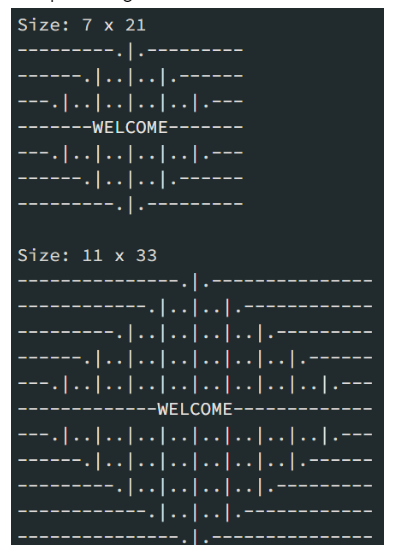

In [148]:
def door_mat(N, M):
    for i in range(1, N, 2):
        print(('.|.' * i).center(M, '-'))
    print('WELCOME'.center(M, '-'))
    for i in range(N-2, 0, -2):
        print(('.|.' * i).center(M, '-'))
N = 7 
M = 21  
door_mat(N, M)

---------.|.---------
------.|..|..|.------
---.|..|..|..|..|.---
-------WELCOME-------
---.|..|..|..|..|.---
------.|..|..|.------
---------.|.---------


#### Question: 4

Given an array nums of n integers, return an array of all the unique quadruplets [nums[a], nums[b], nums[c], nums[d]] such that:

   a) 0 <= a, b, c, d < n <br>
   b) a, b, c, and d are distinct.<br>
   c) nums[a] + nums[b] + nums[c] + nums[d] == target <br>

In [153]:
def fourSum(nums, target):
    nums.sort()
    n = len(nums)
    result = []
    for i in range(n - 3):
        if i > 0 and nums[i] == nums[i - 1]:
            continue
        for j in range(i + 1, n - 2):
            if j > i + 1 and nums[j] == nums[j - 1]:
                continue
            left, right = j + 1, n - 1
            while left < right:
                total = nums[i] + nums[j] + nums[left] + nums[right]
                if total == target:
                    result.append([nums[i], nums[j], nums[left], nums[right]])
                    left += 1
                    right -= 1
                    while left < right and nums[left] == nums[left - 1]:
                        left += 1
                    while left < right and nums[right] == nums[right + 1]:
                        right -= 1
                elif total < target:
                    left += 1
                else:
                    right -= 1
    return result
nums = [1, 0, -1, 0, -2, 2]
target = 0
print(fourSum(nums, target))


[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]


# SQL

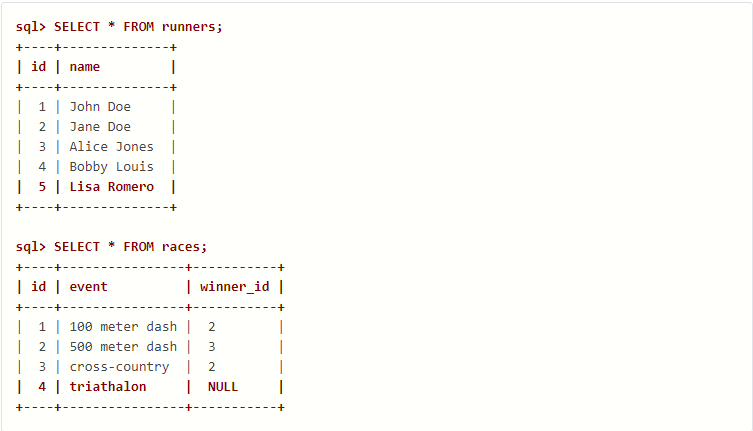
What will be the result of the query below?

SELECT * FROM runners WHERE id NOT IN (SELECT winner_id FROM races)

Explain your answer and also provide an alternative version of this query that will avoid the issue that it exposes.

**ANSWER** : The result includes the runners who have not won any races, which means their id is not present in the winner_id column of the races table.<br>

**Alternate**
<br>

SELECT r.*
FROM runners r
LEFT JOIN races ra ON r.id = ra.winner_id
WHERE ra.winner_id IS NULL;


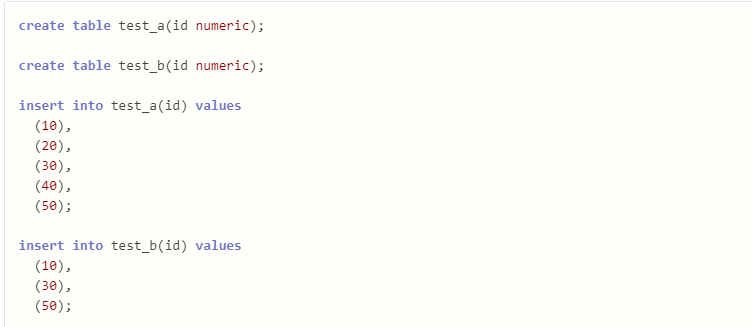
Write a query to fetch values in table test_a that are and not in test_b without using the NOT keyword.

**Answer**
SELECT a.id
FROM test_a a
LEFT JOIN test_b b ON a.id = b.id
WHERE b.id IS NULL;

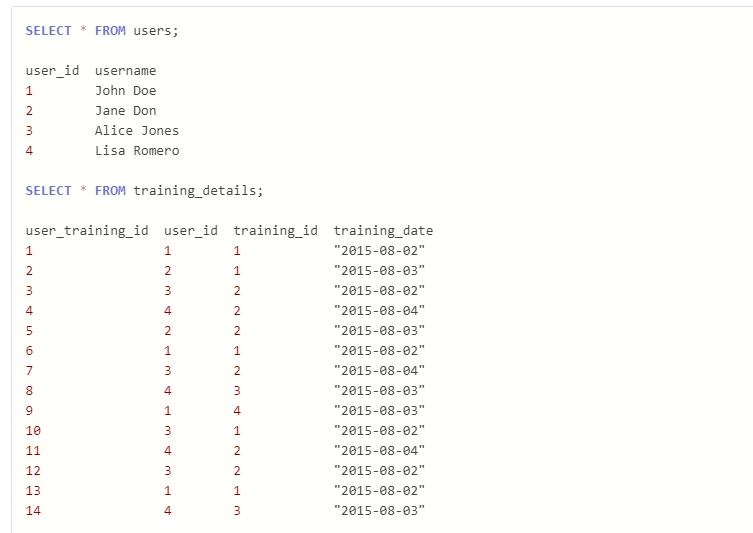
Write a query to to get the list of users who took the a training lesson more than once in the same day, grouped by user and training lesson, each ordered from the most recent lesson date to oldest date.

SELECT
    u.user_id,<br>
    u.username,<br>
    td.training_id,<br>
    td.training_date,<br>
    COUNT(*) AS lesson_count<br>
FROM<br>
    users u<br>
JOIN<br>
    training_details td ON u.user_id = td.user_id<br>
GROUP BY<br>
    u.user_id,<br>
    u.username,<br>
    td.training_id,<br>
    td.training_date<br>
HAVING<br>
    COUNT(*) > 1<br>
ORDER BY<br>
    td.training_date DESC;

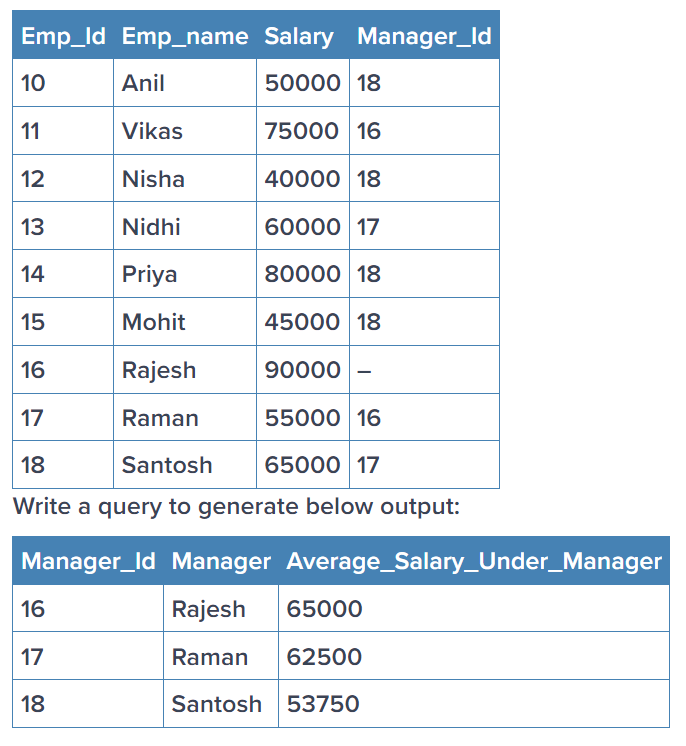

SELECT<br>
  Manager_Id,<br>
  Manager,<br>
  AVG(Salary) AS Average_Salary_Under_Manager<br>
FROM<br>
  (
    SELECT<br>
      e.Manager_Id,<br>
      m.Emp_name AS Manager,<br>
      e.Salary<br>
    FROM<br>
      Employee e<br>
      JOIN Employee m ON e.Manager_Id = m.Emp_Id
  ) AS Subquery<br>
GROUP BY<br>
  Manager_Id, Manager;<br>


# Statistics

Question 1 : What is the meaning of six sigma in statistics?  Give proper example

Answer : a statistical measure of how far a process deviates from perfection

####  Question 2 : What type of data does not have a log-normal distribution or a Gaussian distribution?  Give proper example 

Answer : Data like Gender , color , married_or_not <br>
		So Categorical data consist of category or labels that mostly represent qualitative attributes 
These type of data can’t be represent like log normal distributed or gaussian distribution because they don't have numerical values with a meaningful order


#### Question 3 : What is the meaning of the five-number summary in Statistics? Give proper example

#### Question 4 : What is correlation? Give an example with a dataset & graphical representation on jupyter Notebook

Answer : Correlation measure the relationship between two variable .<br>
It can be positive correlation or negative correlation

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


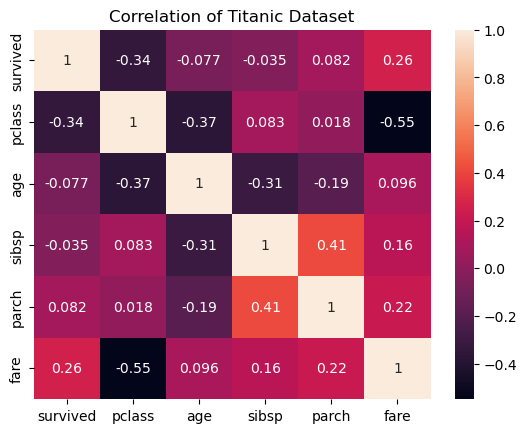

In [4]:
# just check the relationship of titanic data
numerical_columns = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
corr = df[numerical_columns].corr()

sns.heatmap(corr, annot=True)
plt.title('Correlation of Titanic Dataset')
plt.show()

# Machine Learning

#### Question: 1

Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("instagram_reach.csv")

In [7]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [9]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df= df.drop(['Unnamed: 0', 'S.No'], axis=1)

In [12]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


# univariate analysis

<Axes: xlabel='Followers', ylabel='Count'>

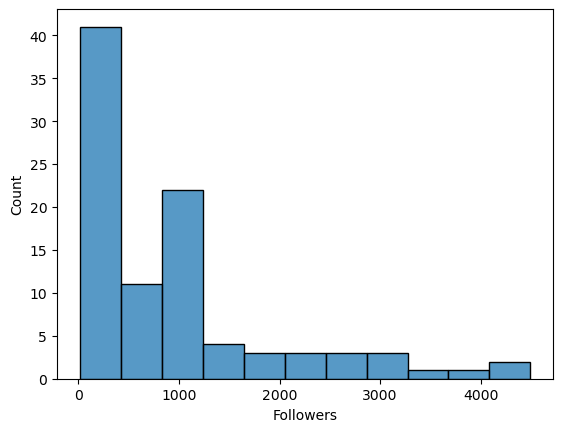

In [14]:
sns.histplot(df['Followers'])

<Axes: xlabel='Likes', ylabel='Count'>

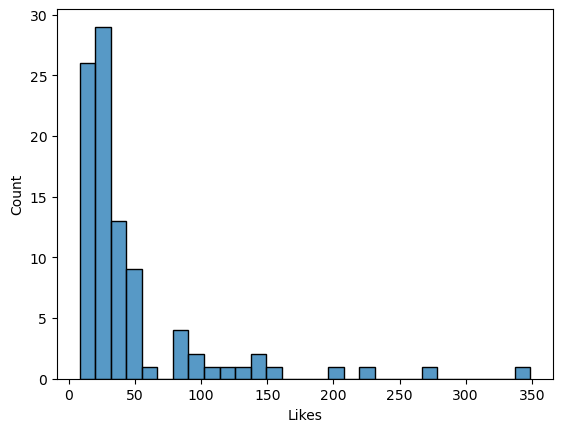

In [15]:
sns.histplot(df['Likes'])

In [16]:
from wordcloud import WordCloud,STOPWORDS

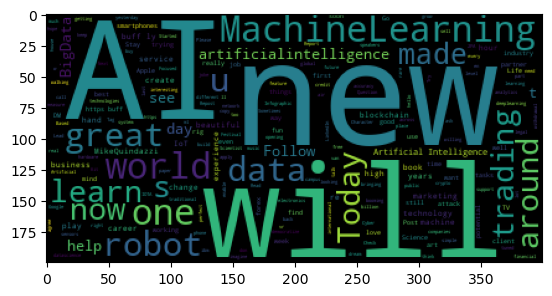

In [17]:
text = " ".join(i for i in df['Caption'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud)

In [18]:
# most common words are AI new MAchine learning

In [19]:
features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time = 'Time since posted'

# Bivariate analysis

<Axes: xlabel='Likes', ylabel='Time since posted'>

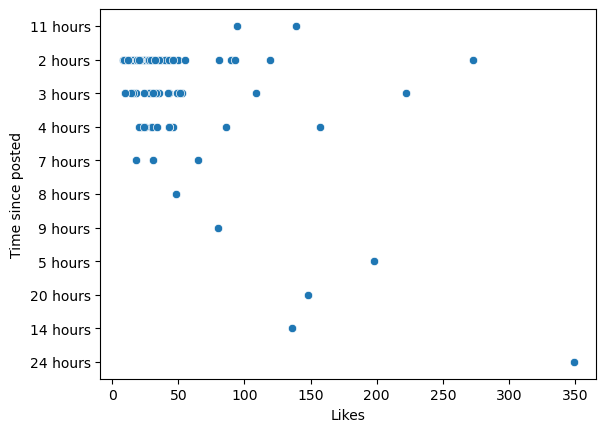

In [20]:
sns.scatterplot(x='Likes', y='Time since posted', data=df)

In [21]:
# Most of the likes are in 0 - 5 hours

<Axes: xlabel='Likes', ylabel='Followers'>

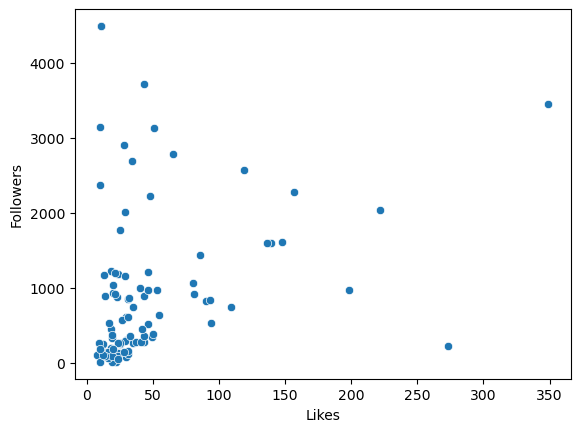

In [22]:
sns.scatterplot(x='Likes', y='Followers', data=df)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [24]:
X = df[features]
y_likes = df[target_likes]
y_time = df[target_time]
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(X, y_likes, y_time, test_size=0.30, random_state=42)


In [25]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
Linear = LinearRegression()
Linear.fit(X_train_encoded, y_likes_train)

LinearRegression()

In [28]:
predict = Linear.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, predict)

In [29]:
likes_mse

1394.1496217260255

================================================================================================================================

#### Question: 2
Train an SVM regressor on : Bengaluru housing dataset
    Must include in details:
  - EDA
  - Feature engineering 

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [32]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [33]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [34]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [35]:
df = df.drop(columns=['area_type','availability','society','balcony'])

In [36]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [37]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [38]:
df['bhk'] = df['size'].apply(lambda x:int(x.split(' ')[0]))

In [39]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [40]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [41]:
df[~df['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [42]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [43]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]

In [44]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [45]:
df['location'] = df['location'].apply(lambda x : x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [46]:
location_stats_less_10 = location_stats[location_stats<=10]
location_stats_less_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [47]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_10 else x)

In [49]:
import numpy as np
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(11434, 7)

In [50]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.0,6,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.0,7,9139.784946


In [51]:
df=df.drop(columns='size')

In [52]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1200.0,6.0,125.0,6,10416.666667
3,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
4,1st Block Jayanagar,930.0,4.0,85.0,7,9139.784946


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label_encoder = LabelEncoder()

In [55]:
df['location'] = label_encoder.fit_transform(df['location'])

In [56]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,0,2850.0,4.0,428.0,4,15017.543860
1,0,1630.0,3.0,194.0,3,11901.840491
2,0,1200.0,6.0,125.0,6,10416.666667
3,0,1875.0,2.0,235.0,3,12533.333333
4,0,930.0,4.0,85.0,7,9139.784946


In [57]:
X = df.drop('price',axis=1)

In [58]:
Y = df['price']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2, random_state=10)

In [63]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [65]:
svm_regressor = SVR(kernel='rbf', C=100, gamma='auto') 
svm_regressor.fit(X_train_scaled, y_train)

SVR(C=100, gamma='auto')

In [66]:
y_pred = svm_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

11237.146201792957

===============================================================================================================================

#### Question: 3

Train and fine tune a decision tree using the wine dataset by following the following steps:-

  1. Use load_wine() to generate wine dataset
  2. Split the dataset into train and test  dataset
  3. Use random search CV to hyperparameter tune the Decision Tree
  4. Try to achieve an accuracy of at least 85%


Grow a random forest using the following steps:-

  1. Continuing the previous question, create 10 subsets of the training dataset. You can use the ShuffleSplit                class for it.
  2. Train 1 decision tree on each subset, using the best hyperparameter values found in the previous question.
  3. Evaluate all the trees on the test dataset. Are they performing better than the tree created in the previous question?

In [67]:
from sklearn.datasets import load_wine
wine = load_wine()

In [68]:
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

In [69]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [70]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [71]:
# since the datset is clean we can directly go to the split
# Split the dataset into train and test  dataset

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier(criterion="gini",splitter="random")

In [76]:
dtree.fit(X_train,y_train)
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [79]:
train_accuracy, test_accuracy

(1.0, 0.9444444444444444)

In [80]:
# Hyperparameter tunning for the dtree

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [82]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}
dt = DecisionTreeClassifier(random_state=42)

In [83]:
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002041C8E0E10>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002041CC31410>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002041BCC0910>},
                   random_state=42)

In [84]:
best_params = random_search.best_params_

In [85]:
best_params

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [86]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       min_samples_split=3, random_state=42)

In [87]:
# now apply this 

In [88]:
hyperparameter = random_search.best_estimator_
y_pred = hyperparameter.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9444444444444444

# Random_Forest 

In [89]:
from sklearn.model_selection import ShuffleSplit

In [90]:
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [91]:
decision_trees = []

In [92]:
for i, _ in shuffle_split.split(X_train):
    subset_X_train, subset_y_train = X_train[i], y_train[i]
    dt = DecisionTreeClassifier(**best_params)
    dt.fit(subset_X_train, subset_y_train)
    decision_trees.append(dt)

In [93]:
test_accuracies = []
for dt in decision_trees:
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)

In [94]:
average_accuracy_trees = sum(test_accuracies) / len(test_accuracies)
print("Average accuracy of the trees:", average_accuracy_trees)
if average_accuracy_trees > test_accuracy:
    print("The tree are performing better than the single DTree.")
else:
    print("The tree are not performing better than the single DTree.")

Average accuracy of the trees: 0.9166666666666666
The tree are not performing better than the single DTree.


================================================================================================================================

# Deep Learning

Question: 1<br>
(a) Explain how you can implement DL in a real-world application.<br>
(b) What is the use of Activation function in Artificial Neural Networks? What would be the problem if we don't use it in ANN networks.

Answer a:<br>
- Define the problem statement : First we have to understand the problem statement and DL is suitable mostly for the vergy huge dataset or image datset or speech dataset or many more 
- Collecting the Data : Gather the data from the source
- Then do the preprocess : Preprocess the data make it in a suitable format
- Then select th framework : selecting framework like pytorch tensorflow or keras 
- Then design our NN : we will define our weights , activation function optimizers and number of hidden layer , here we also define our pooling padding batch normalization dropout all these things
- Train our model : then split the data into train test and validation
- fine tune : do the fine tunning choosing the best hyper parameter for our network 
- deploy the model : deploy the model and observing it that now what output it can gave the output based on the real world scenarios

Answer b:<br>
Use of activation function in ANN : help the network to learn complex patterns and relationships in data and ensure the output 
Some activation function are like sigmoid tanh relu softmax pre-relu elu swiss etc<br>
Problem if we dont use activation function in neural networks thenthey fail to learn the complex pattern and relationship ni data

================================================================================================================================

#### Question 2
Train a Pure ANN with less than 10000 trainable parameters using the MNIST Dataset

In [95]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist

In [96]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [97]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [98]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [99]:
Y_train = to_categorical(y_train, 10)
Y_test =to_categorical(y_test, 10)

In [100]:
from tensorflow.keras.layers import BatchNormalization, Activation

model = Sequential()
model.add(Convolution2D(8,(3, 3), activation ='relu',input_shape = (28,28,1))) 
model.add(BatchNormalization())
model.add(Convolution2D(16,(3, 3), activation ='relu'))                        
model.add(BatchNormalization())
model.add(Convolution2D(32,(1,1), activation ='relu'))                       
model.add(MaxPooling2D(pool_size=(2,2)))                                                     
model.add(Dropout(0.3))                       
model.add(Convolution2D(16,(3,3), activation ='relu'))                         
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10,4,4))                                            
model.add(Flatten())
model.add(Activation('softmax'))

In [101]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 batch_normalization (Batch  (None, 26, 26, 8)         32        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0

In [102]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

In [104]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [105]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


1500/1500 [==============================] - 26s 15ms/step - loss: 0.8915 - accuracy: 0.7155 - val_loss: 0.4454 - val_accuracy: 0.8543
Epoch 2/100
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4880 - accuracy: 0.8389 - val_loss: 0.3656 - val_accuracy: 0.8830
Epoch 3/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.4239 - accuracy: 0.8623 - val_loss: 0.3222 - val_accuracy: 0.8968
Epoch 4/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3913 - accuracy: 0.8720 - val_loss: 0.2981 - val_accuracy: 0.9037
Epoch 5/100
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3698 - accuracy: 0.8801 - val_loss: 0.2891 - val_accuracy: 0.9078
Epoch 6/100
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3587 - accuracy: 0.8830 - val_loss: 0.2760 - val_accuracy: 0.9111
Epoch 7/100
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3460 - accuracy: 0.8873 - val_loss:

In [106]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss , test_accuracy

313/313 [==============================] - 2s 4ms/step - loss: 0.2521 - accuracy: 0.9176


(0.25207382440567017, 0.9175999760627747)

================================================================================================================================

## QUESTION 3 of DL

In [107]:
df1 = pd.read_csv('C:/Users/Asus/Desktop/placement/ineuron/Restraunt_Project/notebook/data/zomato.csv')


In [108]:
df1.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [109]:
df1.drop(['url','address','name','reviews_list','rest_type','listed_in(city)','dish_liked'],inplace=True,axis=1)

In [110]:
df1['phone'].fillna('No', inplace=True)
df1.loc[df1['phone'] != 'No', 'phone'] = 'Yes'

In [111]:

df1['location'].fillna(df1['location'].mode()[0],inplace=True)
# fill the cuisiness with the mode once again
df1['cuisines'].fillna(df1['cuisines'].mode()[0],inplace=True)

In [112]:
df1['rate'] = df1.rate.str.replace('/5','')

In [113]:
df1.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [114]:
df1['rate'] = df1.rate.replace('NEW',np.nan)
df1['rate'] = df1.rate.replace('-',np.nan)
df1['rate'] = df1.rate.astype(float)
mean = df1['rate'].mean()
mean

3.700448817952718

In [115]:
df1['rate'] = df1['rate'].fillna(mean)

In [116]:
df1.rename(columns={'approx_cost(for two people)':'costing'},inplace=True)
df1.costing.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [117]:
df1['costing'] = df1['costing'].str.replace(',','')
df1['costing'].fillna(df1['costing'].median(),inplace=True)
df1['costing'] = df1['costing'].astype(int)

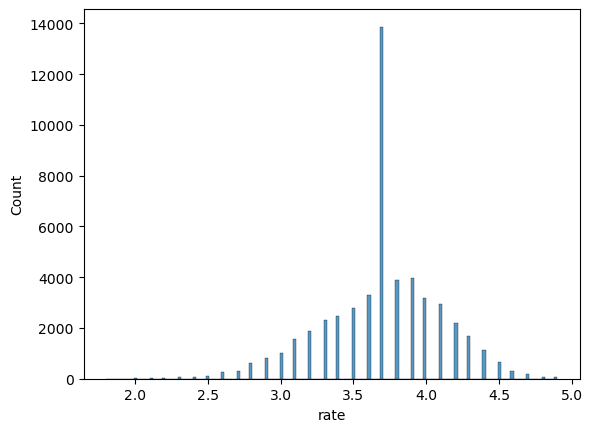

In [118]:
sns.histplot(df1.rate)
plt.show()

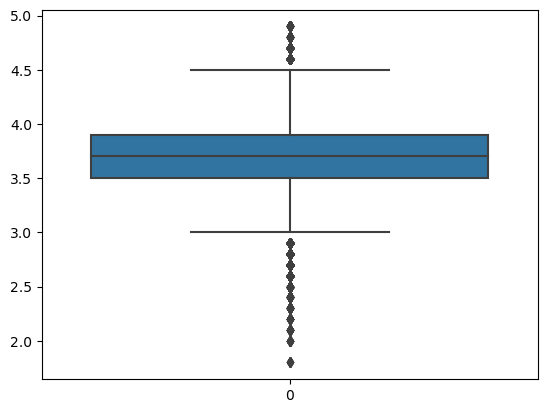

In [119]:
sns.boxplot(df1.rate)
plt.show()

In [120]:
len(df1[(df1.rate>4.5) | (df1.rate<3.0)])

2845

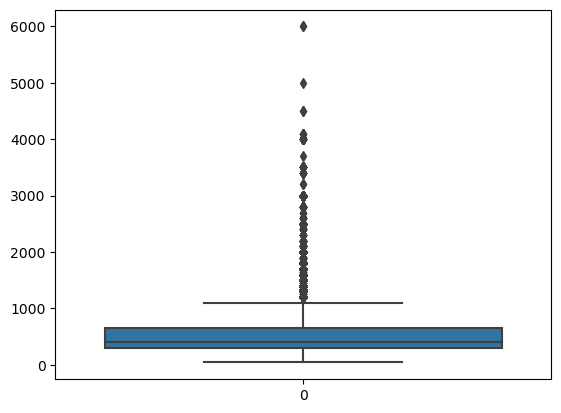

In [121]:
sns.boxplot(df1.costing)
plt.show()

<Axes: xlabel='costing', ylabel='rate'>

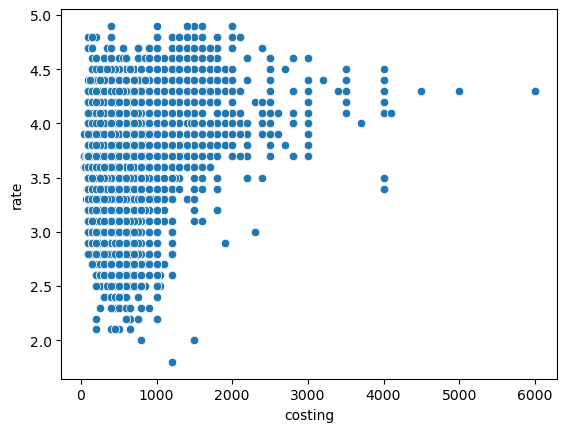

In [122]:
sns.scatterplot(x=df1.costing,y=df1.rate)

In [123]:
Q1 = df1['rate'].quantile(0.25)
Q3 = df1['rate'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df1 = df1[(df1['rate'] >= lower) & (df1['rate'] <= upper)]

In [124]:
Q1 = df1['costing'].quantile(0.25)
Q3 = df1['costing'].quantile(0.75)
IQR = Q3-Q1
lower_costing = Q1-1.5*IQR
upper_costing = Q3+1.5*IQR
df1 = df1[(df1['costing'] >= lower_costing) & (df1['costing'] <= upper_costing)]

<Axes: xlabel='costing', ylabel='rate'>

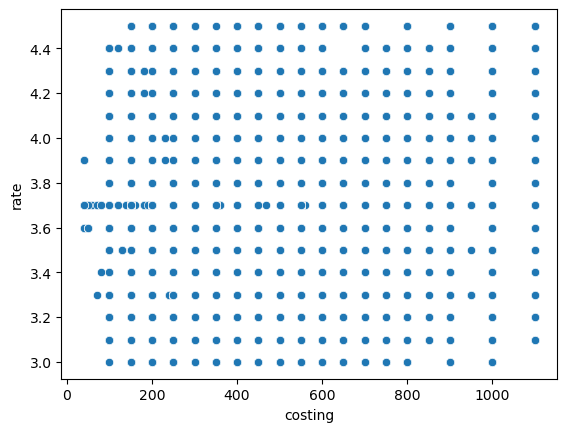

In [125]:
sns.scatterplot(x = df1.costing,y = df1.rate)

In [126]:
df1.drop_duplicates(inplace=True)

In [127]:
online_order = df1.groupby('online_order')['rate'].mean()
online_order

online_order
No     3.675345
Yes    3.745918
Name: rate, dtype: float64

In [128]:
book_table = df1.groupby('book_table')['rate'].mean()
book_table

book_table
No     3.692935
Yes    4.068839
Name: rate, dtype: float64

In [129]:
phone = df1.groupby('phone')['rate'].mean()
phone

phone
No     3.731305
Yes    3.723583
Name: rate, dtype: float64

In [130]:
df1.groupby('location')['rate'].mean()[0:5].sort_values(ascending = False)

location
Basavanagudi         3.720420
Banashankari         3.695477
BTM                  3.673640
Bannerghatta Road    3.619471
Banaswadi            3.600109
Name: rate, dtype: float64

In [131]:
df1.groupby('listed_in(type)')['rate'].mean().sort_values(ascending=False)

listed_in(type)
Drinks & nightlife    3.933351
Buffet                3.932305
Cafes                 3.917368
Pubs and bars         3.871842
Desserts              3.791990
Delivery              3.706497
Dine-out              3.702274
Name: rate, dtype: float64

In [132]:
def name_array_length(arr):
    if len(arr) > 2:
        return 'menu available'
    else:
        return 'menu not availabe'
df1['menu'] = df1['menu_item'].apply(name_array_length)

In [133]:
df1.drop(['menu_item'],inplace=True,axis=1)

In [134]:
def cuisines(data):
    cuisine = len(str(data).split(','))
    return cuisine
df1['cuisines'] = df1['cuisines'].apply( cuisines)
df1.sample(7)

,online_order,book_table,rate,votes,phone,location,cuisines,costing,listed_in(type),menu
33490,Yes,No,3.6,23,Yes,Ejipura,3,800,Delivery,menu available
1930,Yes,No,3.6,59,Yes,JP Nagar,3,400,Desserts,menu not availabe
44389,No,No,3.9,54,Yes,New BEL Road,2,400,Desserts,menu not availabe
32906,Yes,No,3.9,395,Yes,Koramangala 7th Block,3,750,Delivery,menu available
41766,Yes,No,3.5,14,Yes,Marathahalli,1,200,Dine-out,menu not availabe
25702,Yes,No,3.9,115,Yes,Kammanahalli,1,550,Delivery,menu available
18082,Yes,No,3.4,11,Yes,Indiranagar,3,500,Delivery,menu not availabe


In [135]:
df1.groupby('cuisines')['rate'].mean().sort_values(ascending=False)


cuisines
7    4.042920
6    3.973889
5    3.899241
8    3.887547
4    3.803295
3    3.730299
2    3.693176
1    3.667415
Name: rate, dtype: float64

In [136]:
X = df1.drop(columns=['rate'],axis=1)
Y = df1['rate']

In [137]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [138]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)

cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehotencoder',OneHotEncoder(sparse_output=False, handle_unknown='ignore', categories='auto'))
    ]
)

In [139]:
preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [140]:
X = preprocessor.fit_transform(X)

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)
X_train.shape,X_test.shape

((21480, 111), (9207, 111))

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [143]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation ="linear")  # Output layer with one neuron for regression
])


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)



Epoch 1/100
537/537 [==============================] - 2s 2ms/step - loss: 0.6263 - val_loss: 0.1121
Epoch 2/100
537/537 [==============================] - 1s 2ms/step - loss: 0.0957 - val_loss: 0.0830
Epoch 3/100
537/537 [==============================] - 1s 2ms/step - loss: 0.0866 - val_loss: 0.0886
Epoch 4/100
537/537 [==============================] - 1s 2ms/step - loss: 0.0841 - val_loss: 0.0888
Epoch 5/100
537/537 [==============================] - 1s 2ms/step - loss: 0.0856 - val_loss: 0.0928
Epoch 6/100
537/537 [==============================] - 1s 2ms/step - loss: 0.0923 - val_loss: 0.1006
Epoch 7/100
537/537 [==============================] - 1s 2ms/step - loss: 0.0857 - val_loss: 0.0799
Epoch 8/100
537/537 [==============================] - 1s 2ms/step - loss: 0.0799 - val_loss: 0.0717
Epoch 9/100
537/537 [==============================] - 1s 2ms/step - loss: 0.0740 - val_loss: 0.0770
Epoch 10/100
537/537 [==============================] - 1s 2ms/step - loss: 0.0726 - val_lo

In [145]:
from sklearn.metrics import mean_squared_error

In [146]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

288/288 [==============================] - 1s 1ms/step


In [147]:
mse

0.11065412338006955